# 1) Criando Features e Targets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNBbay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

data = pd.read_csv("D:\Meus Documentos - jpcam\Documentos\documentos [python e data science]\IEEE\Período 3\winequality.csv")

In [2]:
features = data.drop(columns=['Unnamed: 0', 'quality', 'wine_is_red'])

In [3]:
features.to_csv(r'D:\Meus Documentos - jpcam\Documentos\documentos [python e data science]\IEEE\Período 3\features.csv', index = False)

In [4]:
target1 = data[['wine_is_red']]
target2 = data[['quality']]

In [5]:
target1.to_csv(r'D:\Meus Documentos - jpcam\Documentos\documentos [python e data science]\IEEE\Período 3\target1 - wine_is_red.csv', index = False)
target2.to_csv(r'D:\Meus Documentos - jpcam\Documentos\documentos [python e data science]\IEEE\Período 3\target2 - quality.csv', index = False)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target1, test_size=0.2, random_state=1)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197, 1)
(1300, 11)
(1300, 1)


# 2) Naive Bayes

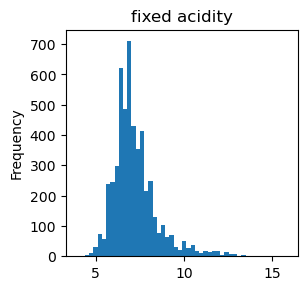

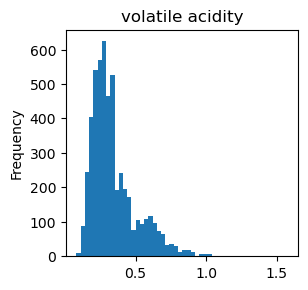

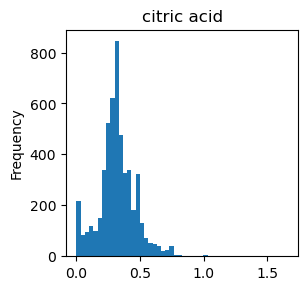

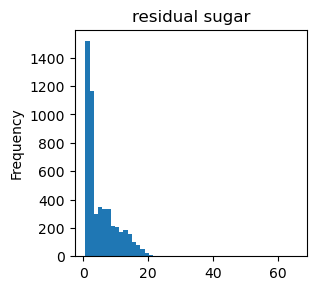

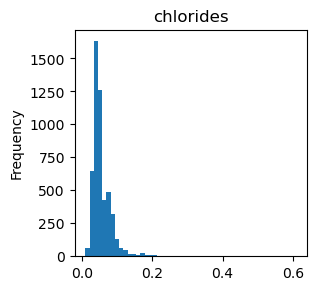

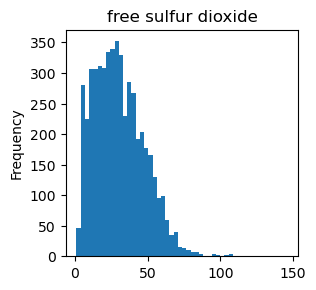

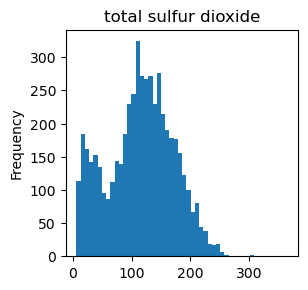

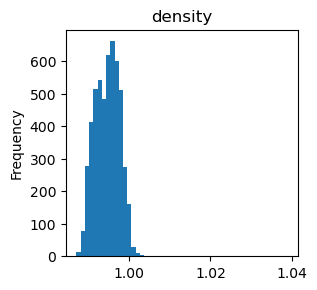

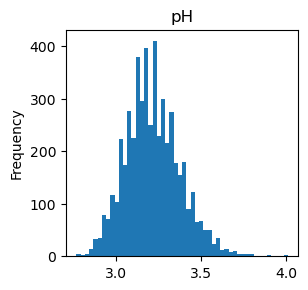

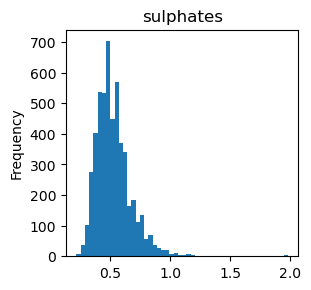

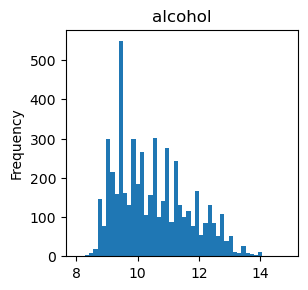

In [8]:
colunas = X_train.columns
for i in colunas:
    plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':100})

    x = np.random.normal(size = 1000)
    plt.hist(X_train[i], bins=50)
    plt.gca().set(title=i, ylabel='Frequency')
    
    plt.show()

Podemos considerar as colunas como sendo distribuições normais, e assim aplicar Naive Bayes.

In [9]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [10]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [11]:
total_de_testes = X_test.shape[0]
num_de_acertos = (y_test != y_pred).sum()
print("Tivemos {} erros de um total de {} pontos".format(num_de_acertos, total_de_testes))
print("Percentual de acerto: {}%".format((1-num_de_acertos/total_de_testes)*100))

Tivemos 55 erros de um total de 1300 pontos
Percentual de acerto: 95.76923076923077%


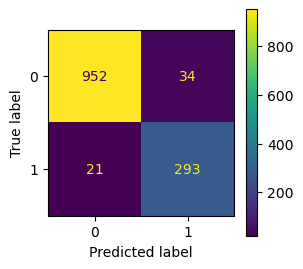

In [12]:
plot_confusion_matrix(gnb, X_test, y_test)
plt.show() 

# 3) K-Nearest Neighbors (KNN)

#### Normalização:

In [13]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [14]:
neigh = KNeighborsClassifier(n_neighbors=5)
y_pred = neigh.fit(X_train, y_train).predict(X_test)

In [15]:
total_de_testes = X_test.shape[0]
num_de_acertos = (y_test != y_pred).sum()
print("Tivemos {} erros de um total de {} pontos".format(num_de_acertos, total_de_testes))
print("Percentual de acerto: {}%".format((1-num_de_acertos/total_de_testes)*100))

Tivemos 70 erros de um total de 1300 pontos
Percentual de acerto: 94.61538461538461%


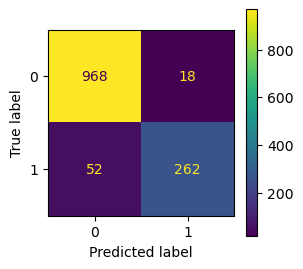

In [16]:
plot_confusion_matrix(neigh, X_test, y_test)
plt.show() 